<a href="https://colab.research.google.com/github/srinijalanda93/SPR_LAB/blob/main/2448526_LAB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 1 — Upload Your Audio Files

In [1]:
from google.colab import files
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

print("Upload your audio saying 'hello' (Signal 1):")
uploaded1 = files.upload()
file1 = list(uploaded1.keys())[0]

print("Upload your friend's audio saying 'hello' (Signal 2):")
uploaded2 = files.upload()
file2 = list(uploaded2.keys())[0]


Upload your audio saying 'hello' (Signal 1):


Saving voice1.mp3 to voice1 (1).mp3
Upload your friend's audio saying 'hello' (Signal 2):


Saving voice2.mp3 to voice2 (1).mp3


# STEP 2 — Load Audio & Convert to Waveform

In [2]:
signal1, sr1 = librosa.load(file1, sr=None)
signal2, sr2 = librosa.load(file2, sr=None)

print("Sample rate 1:", sr1)
print("Sample rate 2:", sr2)

print("Length Signal 1:", len(signal1))
print("Length Signal 2:", len(signal2))


Sample rate 1: 48000
Sample rate 2: 48000
Length Signal 1: 124280
Length Signal 2: 61886


# STEP 3 — Normalize Both Signals

In [3]:
signal1_norm = signal1 / np.max(np.abs(signal1))
signal2_norm = signal2 / np.max(np.abs(signal2))


# STEP 4 — Plot Both Signals

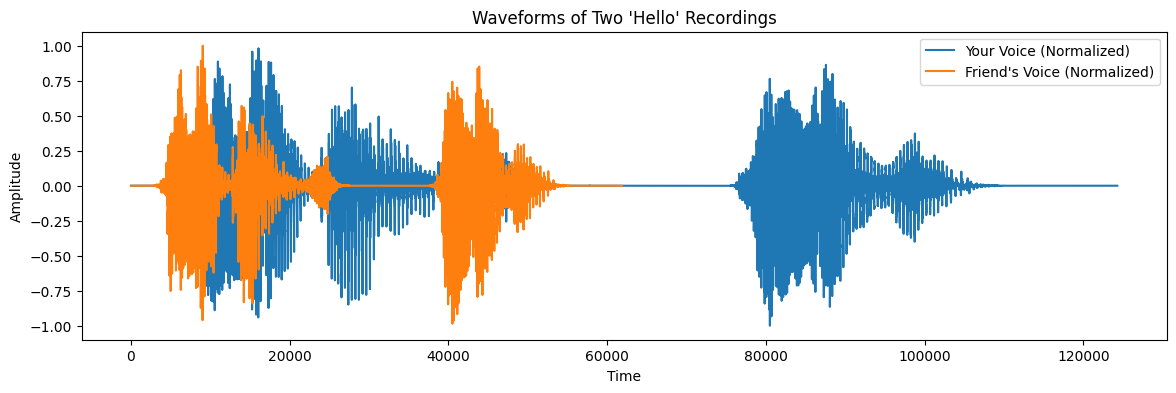

In [4]:
plt.figure(figsize=(14,4))
plt.plot(signal1_norm, label="Your Voice (Normalized)")
plt.plot(signal2_norm, label="Friend's Voice (Normalized)")
plt.legend()
plt.title("Waveforms of Two 'Hello' Recordings")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


#STEP 5 — Extract MFCC Features (for DTW Comparison)

DTW performs better on MFCCs than raw audio.

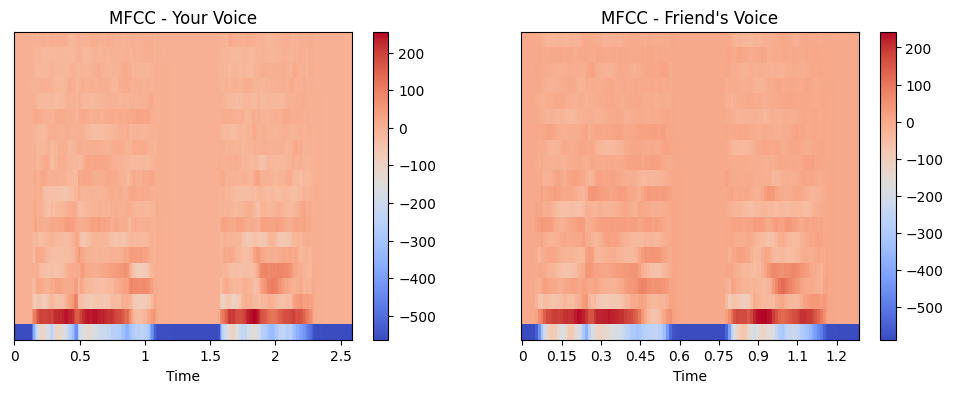

In [5]:
mfcc1 = librosa.feature.mfcc(y=signal1_norm, sr=sr1, n_mfcc=20)
mfcc2 = librosa.feature.mfcc(y=signal2_norm, sr=sr2, n_mfcc=20)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
librosa.display.specshow(mfcc1, sr=sr1, x_axis='time')
plt.title("MFCC - Your Voice")
plt.colorbar()

plt.subplot(1,2,2)
librosa.display.specshow(mfcc2, sr=sr2, x_axis='time')
plt.title("MFCC - Friend's Voice")
plt.colorbar()
plt.show()


# STEP 6 — Apply DTW

In [7]:
from librosa.sequence import dtw

D, wp = dtw(X=mfcc1, Y=mfcc2, metric='euclidean')

dtw_distance = D[-1, -1]
print("DTW Distance =", dtw_distance)

DTW Distance = 14896.095894081856


In [9]:
# STEP 7 — Plot Accumulated Cost Matrix + Warping Path

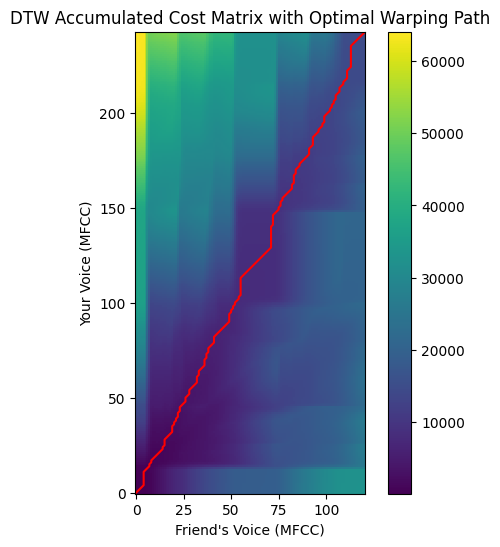

In [8]:
plt.figure(figsize=(6,6))
plt.imshow(D, origin='lower', cmap='viridis', interpolation='nearest')
plt.plot(wp[:, 1], wp[:, 0], color='red')   # warping path
plt.title("DTW Accumulated Cost Matrix with Optimal Warping Path")
plt.xlabel("Friend's Voice (MFCC)")
plt.ylabel("Your Voice (MFCC)")
plt.colorbar()
plt.show()
